## Naive Bayes Classification


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

### Using the risk credit data

In [3]:
risk_data = pd.read_csv('risk_credit.csv')

In [4]:
risk_data

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [6]:
x_risk_data = risk_data.iloc[:,0:4].values
y_risk_data = risk_data.iloc[:,4].values

In [7]:
x_risk_data , y_risk_data

(array([['ruim', 'alta', 'nenhuma', '0_15'],
        ['desconhecida', 'alta', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'adequada', 'acima_35'],
        ['ruim', 'baixa', 'nenhuma', '0_15'],
        ['ruim', 'baixa', 'adequada', 'acima_35'],
        ['boa', 'baixa', 'nenhuma', 'acima_35'],
        ['boa', 'alta', 'adequada', 'acima_35'],
        ['boa', 'alta', 'nenhuma', '0_15'],
        ['boa', 'alta', 'nenhuma', '15_35'],
        ['boa', 'alta', 'nenhuma', 'acima_35'],
        ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_history = LabelEncoder()
label_encoder_debt    = LabelEncoder()
label_encoder_guarantee = LabelEncoder()
label_encoder_income    = LabelEncoder()

In [10]:
x_risk_data[:,0] = label_encoder_history.fit_transform(x_risk_data[:,0])
x_risk_data[:,1] = label_encoder_debt.fit_transform(x_risk_data[:,1])
x_risk_data[:,2] = label_encoder_guarantee.fit_transform(x_risk_data[:,2])
x_risk_data[:,3] = label_encoder_income.fit_transform(x_risk_data[:,3])

In [11]:
x_risk_data

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
import pickle
with open('risk_credit.pkl', "wb") as f:
    pickle.dump([x_risk_data, y_risk_data], f)

#### Algorithm

In [14]:
naive_risk = GaussianNB()
naive_risk.fit(x_risk_data,y_risk_data) #creates the likelihood table

GaussianNB()

In [16]:
#case1: history: good, debt: high, guarantee: none, income: >35
#                0            0                 1           2

#case2: history: bad, debt: high, guarantee: adequate, income: <15
#                2            0                 0           0

prediction = naive_risk.predict([[0,0,1,2], #case1
                                [2,0,0,0]]) #case2


In [17]:
prediction

array(['baixo', 'moderado'], dtype='<U8')

In [19]:
naive_risk.classes_ , naive_risk.class_count_, naive_risk.class_prior_

(array(['alto', 'baixo', 'moderado'], dtype='<U8'),
 array([6., 5., 3.]),
 array([0.42857143, 0.35714286, 0.21428571]))

### Using the credit data

In [21]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)


In [23]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

#### Algorithm

In [24]:
naive_credit = GaussianNB()
naive_credit.fit(x_credit_training,y_credit_training) #creates the likelihood table

GaussianNB()

In [30]:
prediction = naive_credit.predict(x_credit_test)

In [27]:
prediction , y_credit_test

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
accuracy_score(y_true = y_credit_test,
               y_pred = prediction)

0.938

In [33]:
confusion_matrix(y_credit_test,prediction)
#first row output = 0, second = 1
#first column predi = 0, second = 1
#[0,0]= prediction is 0 and true value is 0
#[0,1]= prediction is 1 and true value is 0  #error type 1
#[1,0]= prediction is 0 and true value is 1  #error type 2
#[1,1]= prediction is 1 and true value is 1

array([[428,   8],
       [ 23,  41]])

In [34]:
from yellowbrick.classifier import ConfusionMatrix

0.938

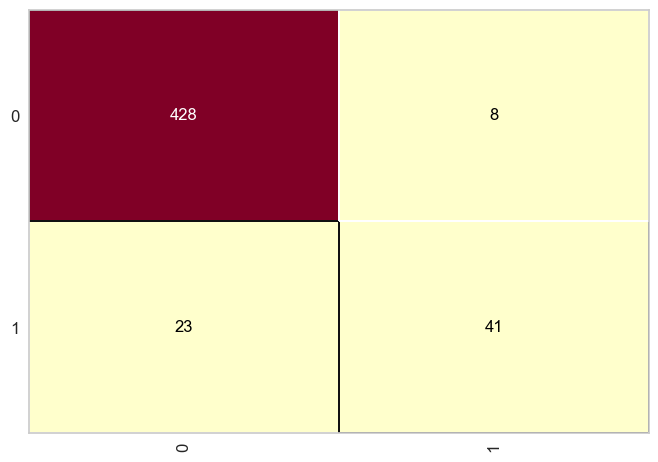

In [35]:
conf_matrix = ConfusionMatrix(naive_credit)
conf_matrix.fit(x_credit_training,y_credit_training)
conf_matrix.score(x_credit_test,y_credit_test)

In [39]:
print(classification_report(y_credit_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



**Recall**: correctly identifies when it is 0 (98%), and since it is 0 the algorithm gets the prediction right 95%

Recall para 1: 41/64 = 0.64

Precision para 1: 41/49 = 0.84